In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch as t
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PCA import classify_sym, type_to_color
%matplotlib inline

Running on the CPU


In [2]:
unitaries_prods = np.load("/Users/jonathanlu/Documents/symmetry-learning/data/3GHZ-PCA-unitaries.npy")
NRUN, NUM_QUBITS = unitaries_prods.shape[:2]
sym_labels = np.array([type_to_color(classify_sym(np.abs(unitary_prod))) \
                            for unitary_prod in unitaries_prods])
print(f"{NRUN} symmetries on a {NUM_QUBITS}-qubit state")

100 symmetries on a 3-qubit state


In [11]:
# Project from the Lie group to 2D space
unitary_vecs = StandardScaler().fit_transform(np.abs(unitaries_prods.reshape((NRUN, -1))))
pca = PCA(n_components=2)
fit = np.squeeze(pca.fit_transform(unitary_vecs))
explained_variance = pca.explained_variance_ratio_
print(f"PCA explained variance ratio = {explained_variance}")
print(f"Fit shape: {fit.shape}")

PCA explained variance ratio = [9.99999999e-01 2.28823119e-10]
Fit shape: (100, 2)


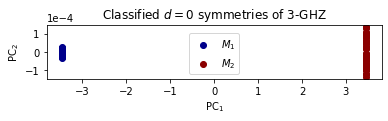

In [23]:
plt.title(rf"Classified $d=0$ symmetries of {NUM_QUBITS}-GHZ")
fig = plt.gcf()
fig.set_size_inches(6, 1)
plt.xlabel(r'PC$_1$')
plt.ylabel(r'PC$_2$')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4, -4))
clab = [('darkblue', r'$M_1$'), ('darkred', r'$M_2$')]
for color, label in clab:
    idxs = np.where(sym_labels == color)
    plt.scatter(fit[idxs,0], fit[idxs,1], c=color, label=label)
plt.legend()
plt.savefig("/Users/jonathanlu/Documents/symmetry-learning/Figures/pca.png")
plt.show()